<h1>Проведение разведывательного анализа данных и составление отчета по успеваемости учащихся в возрасте от 15 до 22 лет.



<h2>Импортируем нужный файлы и библиотеки для работы с файлом 


In [603]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

study = pd.read_csv('stud_math.csv')

<h2>Функции, которые используем в проекте

In [604]:
def get_boxplot(column): # Распределение баллов в зависимости от переменных с помощью box-plot. Distribution of points depending on variables using box-plot
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=study.loc[study.loc[:, column].isin(study.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
def get_stat_dif(column): # Статистическая разница в распределении баллов по номинативным признакам, с помощью теста Стьюдента. Statistical difference in the distribution of points by nominative feature, using the Student's test
    if (type(study.loc[1,column])==str): #проверка на тип данных, т.к тест не хочет работь с числами
        cols = study.loc[:, column].value_counts().index[:10]
        combinations_all = list(combinations(cols, 2))
        for comb in combinations_all:
            if ttest_ind(study.loc[study.loc[:, column] == comb[0], 'score'], 
                            study.loc[study.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all): # Учли поправку Бонферони
                print('Найдены статистически значимые различия для колонки', column)
                break
            
def chart_by_parameter(column): # Вывод графика по параметру, Chart output by parameter 
    study.groupby(by = [column])[column].count().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm')
    
def data_analysis(name_parameter): # Вывод графика по параметру, Chart output by parameter 
    print("Графики",name_parameter)
    get_boxplot(name_parameter)
    chart_by_parameter(name_parameter)
    print("Кол-во пропусков:",study[name_parameter].isnull().sum())
    print("В процентах:",study[name_parameter].isnull().sum()/len(study)*100)
    
        

<h2>1.Осмотр данных

In [605]:
display(study)
study.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [606]:
print("Кол-во учеников: ",len(study))

Кол-во учеников:  395


<a>Данные отображаются корректно. В файле всего 30 показателей и 395 учеников. 13 числовых колонок, 17 строковых. 
Видно, что не у всех параметров по 395 записей, значит есть пропуски.

<h2>2. Просмотр данных по параметрам и анализ номинативных переменных

<h3>Посмотрим на пропуски в DataFrame

In [607]:
print("Кол-во пропусков:\n")
print(study.isnull().sum())
print("\nКол-во пропусков в процентах:\n")
print(study.isnull().sum()/len(study)*100)

Кол-во пропусков:

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

Кол-во пропусков в процентах:

school                  0.000000
sex                     0.000000
age                     0.000000
address                 4.303797
famsize                 

Во многих параметрах присутствуют пропуски, но не критические, далее посмотрим возможность их замены или исключение. Также посмотрим на выбросы 

<h3>Посмотрим на параметры

<h4>School

Графики school


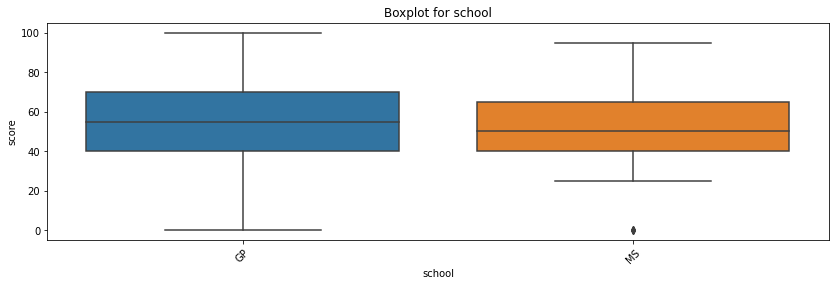

Кол-во пропусков: 0
В процентах: 0.0


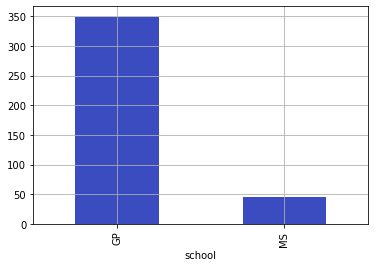

In [608]:
data_analysis("school")

Пропусков нет, больше всего учеников в GP, параметр не сильно влияет на результаты, можно его не включать в итог

<h4>Sex

Графики sex


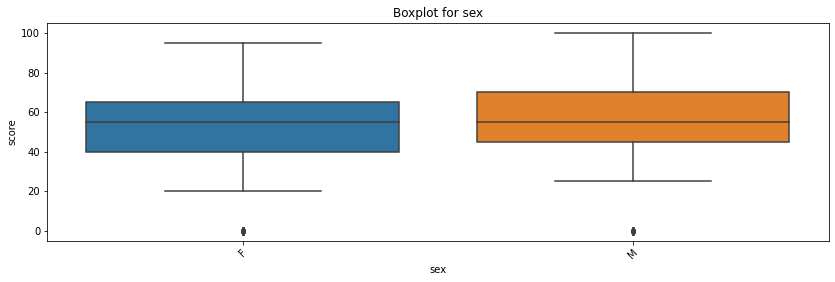

Кол-во пропусков: 0
В процентах: 0.0


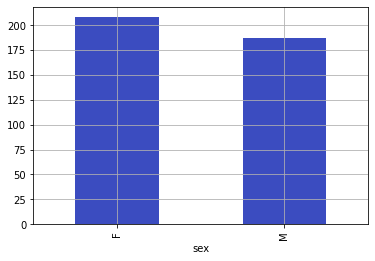

In [609]:
data_analysis("sex")

Примерно одиннаковое расслоение, видно что Male лучше сдают экзамен по математике

<h4>Age

Графики age


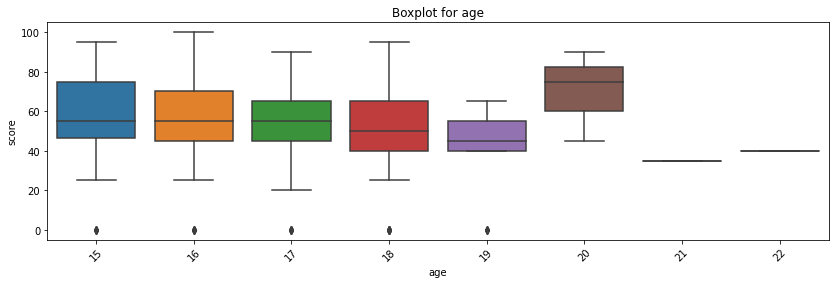

Кол-во пропусков: 0
В процентах: 0.0


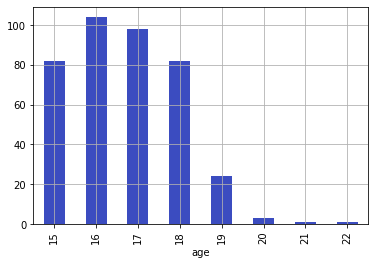

In [610]:
data_analysis("age")

Видно, что основное кол-во учеников в возрасте от 15 до 18. Но лучше всего сдают ученики 20 летнего возраста

<h4>Address

Графики address


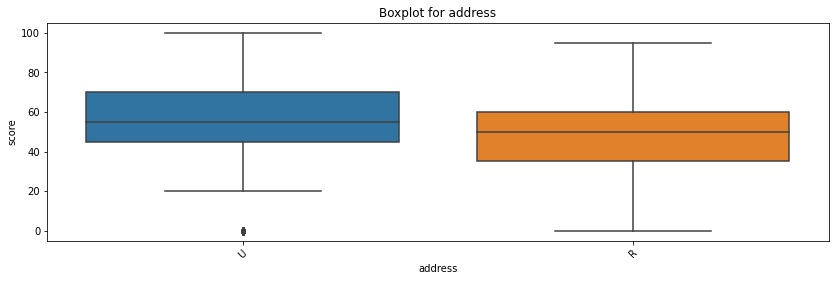

Кол-во пропусков: 17
В процентах: 4.30379746835443


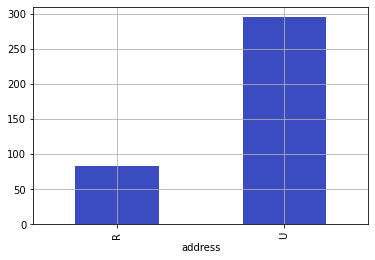

In [611]:
data_analysis("address")

Болеше всего живет в городе, 17 пропусков, замена невозможна

<h4>Famsize

Графики famsize


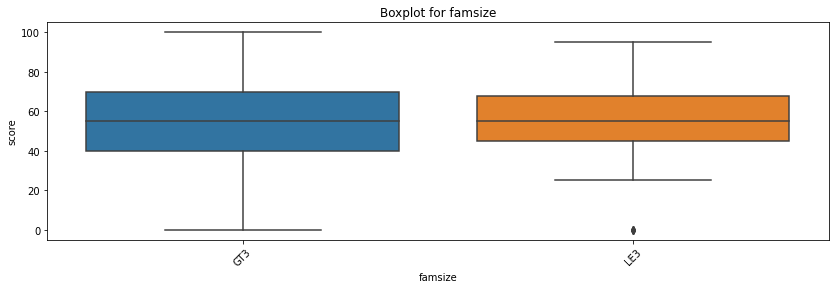

Кол-во пропусков: 27
В процентах: 6.8354430379746836


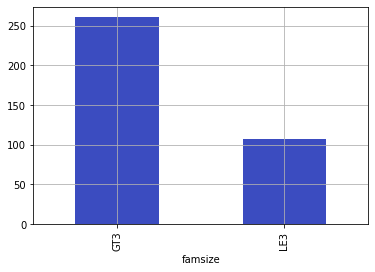

In [612]:
data_analysis("famsize")

Результат не сильно влияет, замена невозможна пустых значений

<h4>Pstatus

Графики Pstatus


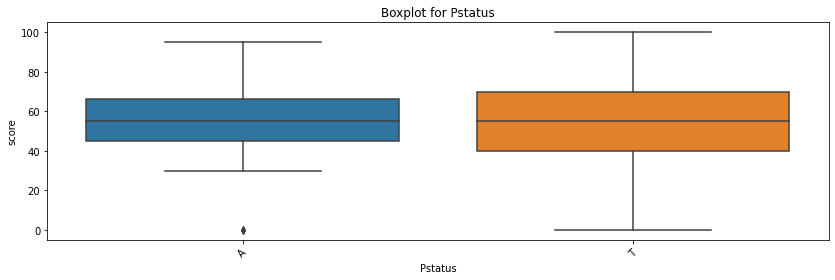

Кол-во пропусков: 45
В процентах: 11.39240506329114


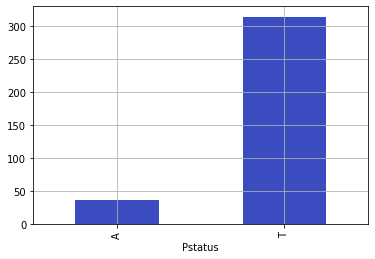

In [613]:
data_analysis("Pstatus")

Имеется максимально кол-во пустых значений, замена возможна на A, т.к замена не сильно повлияет на распределение.
Возможно не следует использовать в итоге

<h4>Medu

Графики Medu


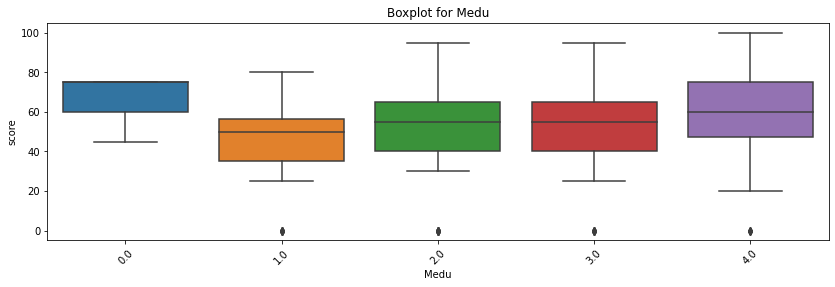

Кол-во пропусков: 3
В процентах: 0.7594936708860759


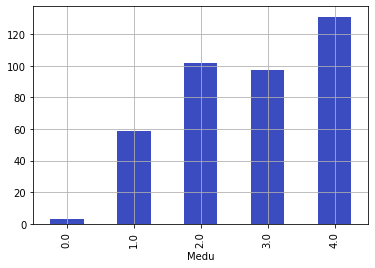

In [614]:
data_analysis("Medu")

Малое кол-во пропусков, видно что лучше всего сдают под категорией 4 (мать с высшым образ)

<h4>Fedu

Графики Fedu


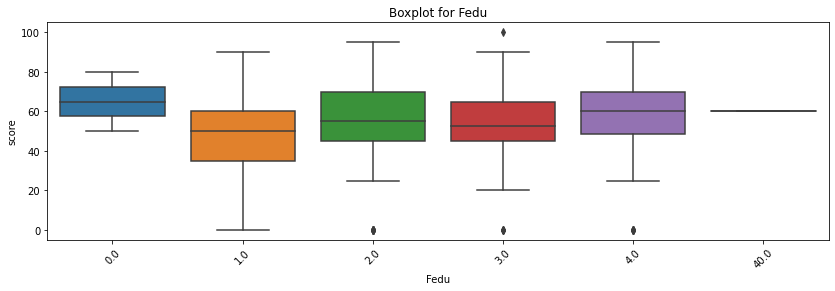

Кол-во пропусков: 24
В процентах: 6.075949367088607


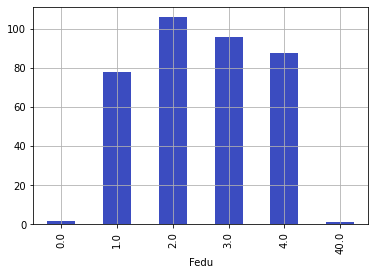

In [615]:
data_analysis("Fedu")

На boxplot видно, что есть выброс 40, возможно опечатка и замена его на 4

In [616]:
study[study.Fedu==40]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


In [617]:
study.loc[11,"Fedu"]=4

Графики Fedu


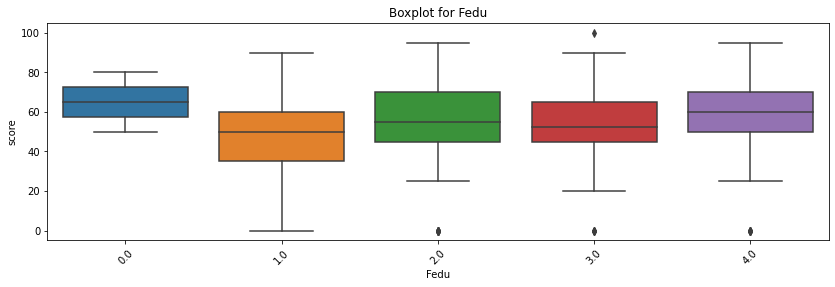

Кол-во пропусков: 24
В процентах: 6.075949367088607


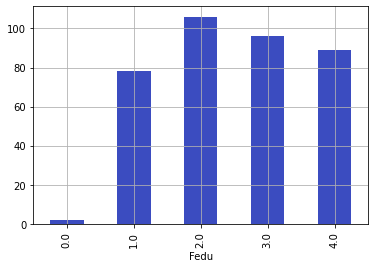

In [618]:
data_analysis("Fedu")

<h4>Mjob

Графики Mjob


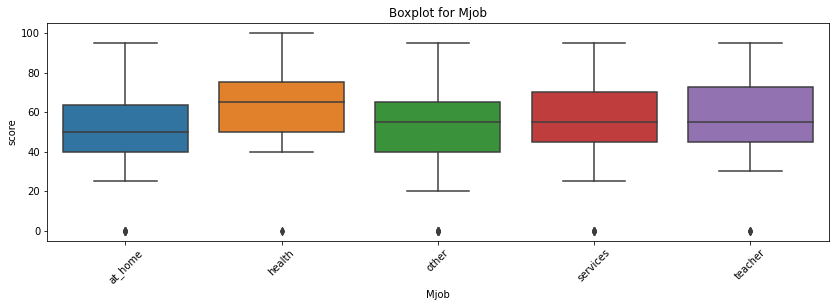

Кол-во пропусков: 19
В процентах: 4.810126582278481


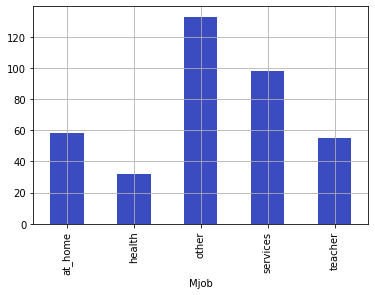

In [619]:
data_analysis("Mjob")

Большенство работют на иных работах, поэтому возможно замена на other

<h4>Fjob

Графики Fjob


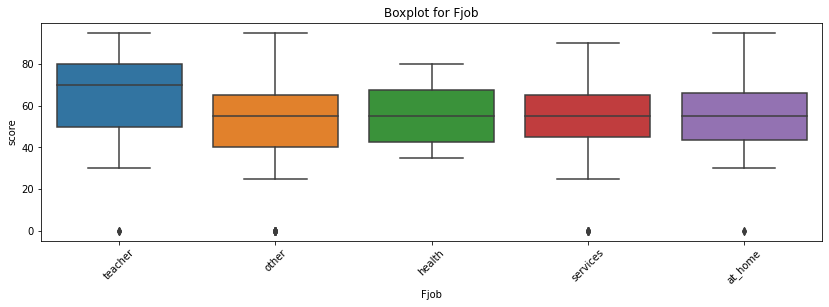

Кол-во пропусков: 36
В процентах: 9.113924050632912


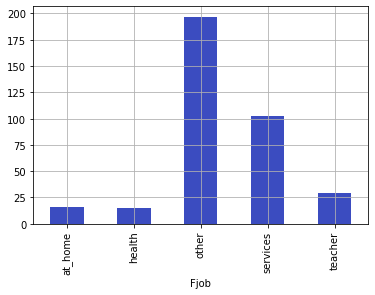

In [620]:
data_analysis("Fjob")

Также как и с переменной Mjob

<h4>Reason

Графики reason


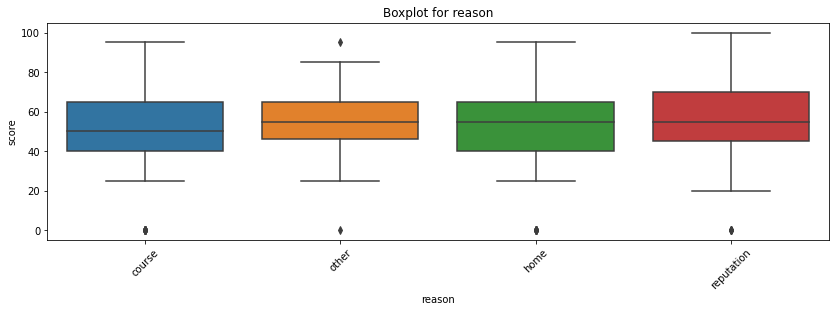

Кол-во пропусков: 17
В процентах: 4.30379746835443


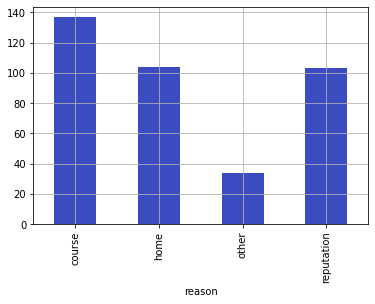

In [621]:
data_analysis("reason")

<h4>Guardian

Графики guardian


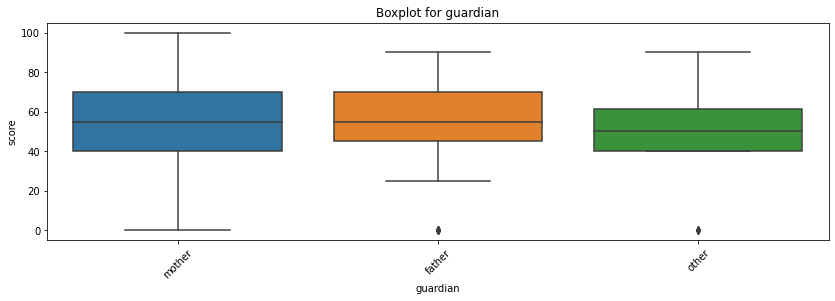

Кол-во пропусков: 31
В процентах: 7.848101265822785


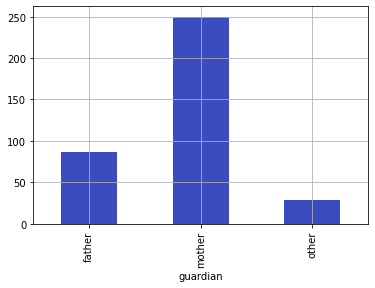

In [622]:
data_analysis("guardian")

<h4>Traveltime

Графики traveltime


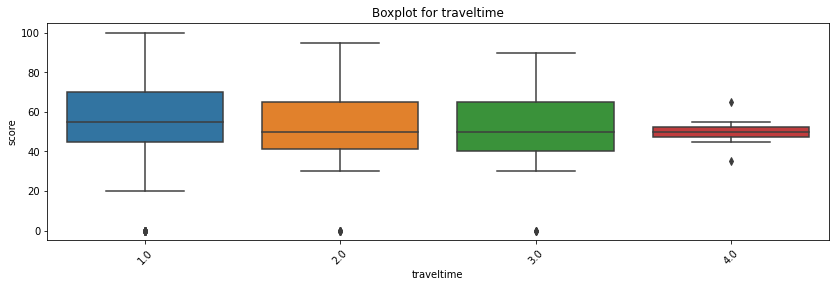

Кол-во пропусков: 28
В процентах: 7.088607594936709


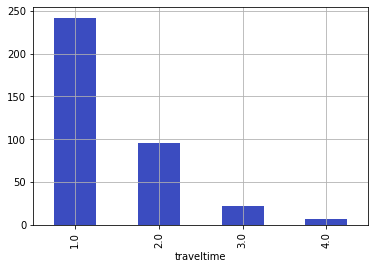

In [623]:
data_analysis("traveltime")

<h4>Studytime

Графики studytime


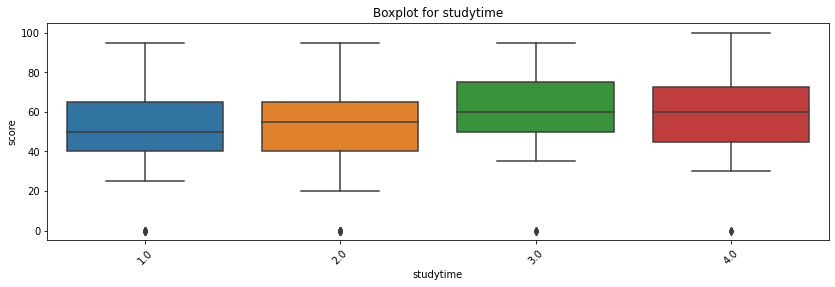

Кол-во пропусков: 7
В процентах: 1.7721518987341773


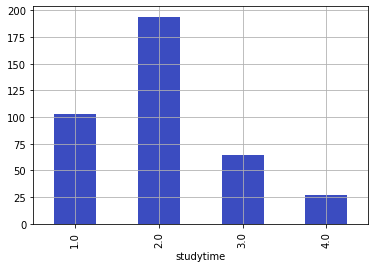

In [624]:
data_analysis("studytime")

<h4>Failures

Графики failures


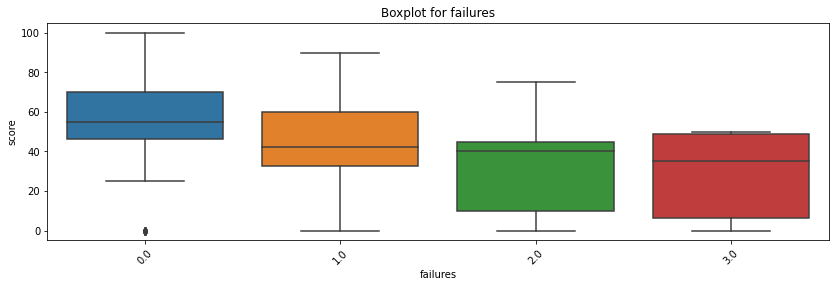

Кол-во пропусков: 22
В процентах: 5.5696202531645564


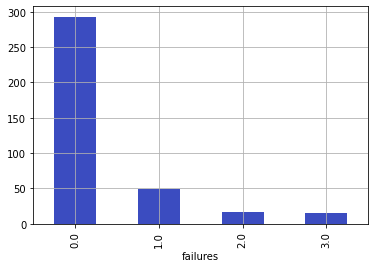

In [625]:
data_analysis("failures")

Параметр сильно влияет на результат. Но параметр очень странный т.к напимано "количество внеучебных неудач (n, если 1<=n<=3, иначе 0)", если неудач >3 то это 0. По моему мнению лучше бы выделить это в отдельную переменную как 4 и более. Но с полученными данными сделать невозможно.

<h4>Schoolsup

Графики schoolsup


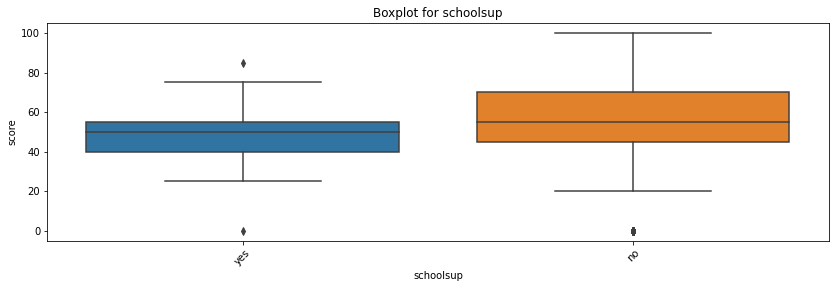

Кол-во пропусков: 9
В процентах: 2.278481012658228


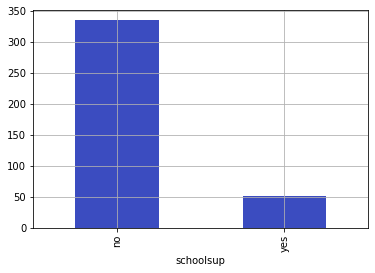

In [626]:
data_analysis("schoolsup")

<h4>Famsup

Графики famsup


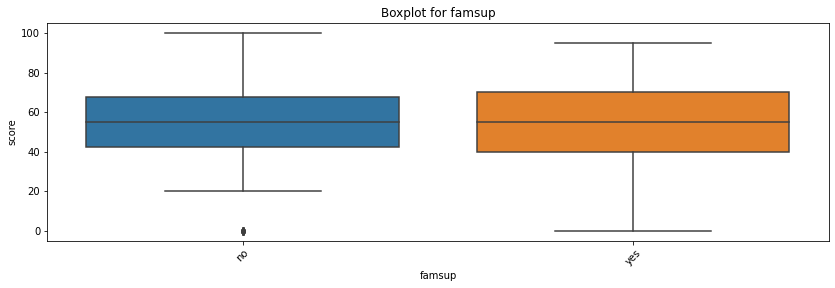

Кол-во пропусков: 39
В процентах: 9.873417721518987


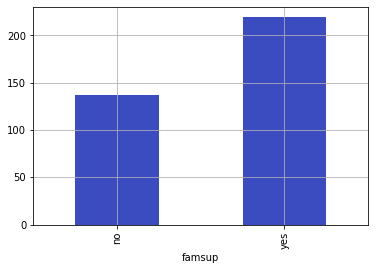

In [627]:
data_analysis("famsup")

Имеется большое количество пропусков. Скорее всего не пойдет в итог

<h4>Paid

Графики paid


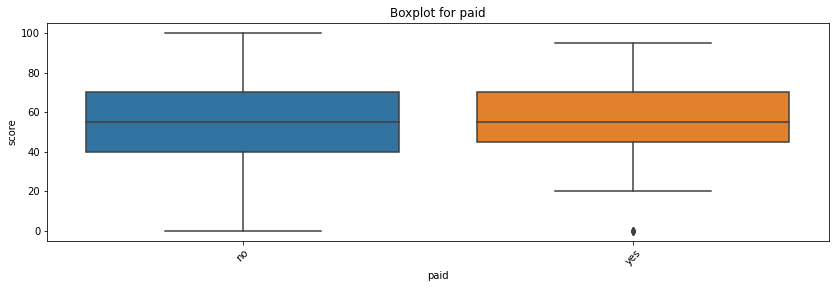

Кол-во пропусков: 40
В процентах: 10.126582278481013


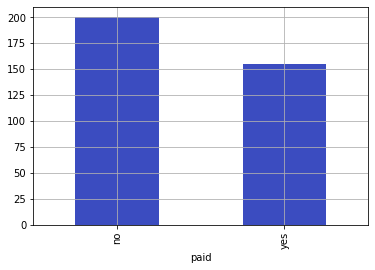

In [628]:
data_analysis("paid")

Также имеетсе большое кол-во пропсков

<h4>Activities

Графики activities


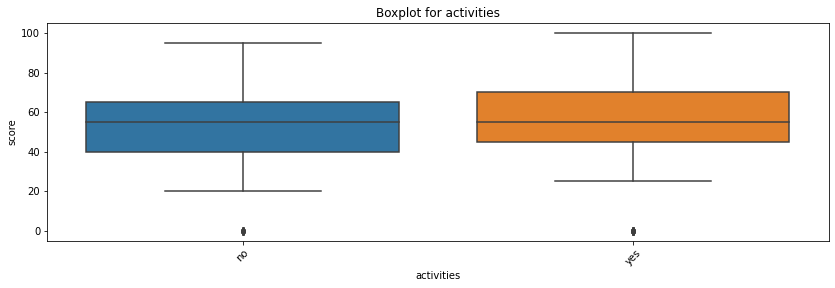

Кол-во пропусков: 14
В процентах: 3.5443037974683547


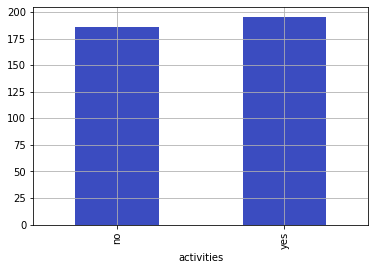

In [629]:
data_analysis("activities")

<h4>Nursery

Графики nursery


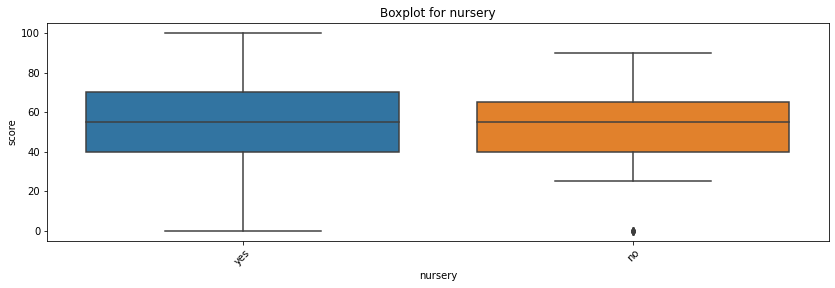

Кол-во пропусков: 16
В процентах: 4.050632911392405


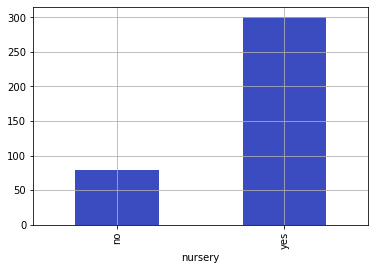

In [630]:
data_analysis("nursery")

<h4>Higher

Графики higher


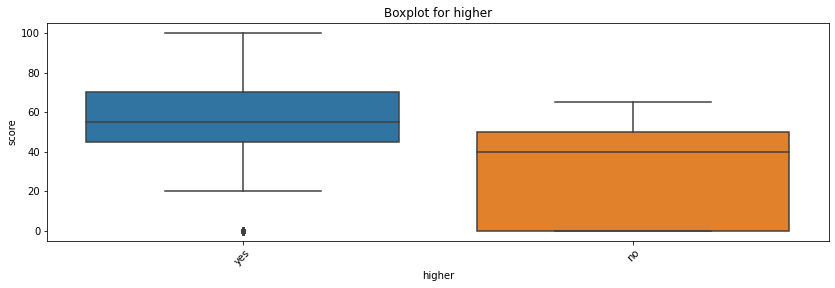

Кол-во пропусков: 20
В процентах: 5.063291139240507


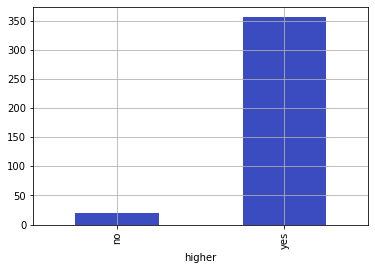

In [631]:
data_analysis("higher")

Сильное влияние на итоговый результат

<h4>Studytime, granular

Графики studytime, granular


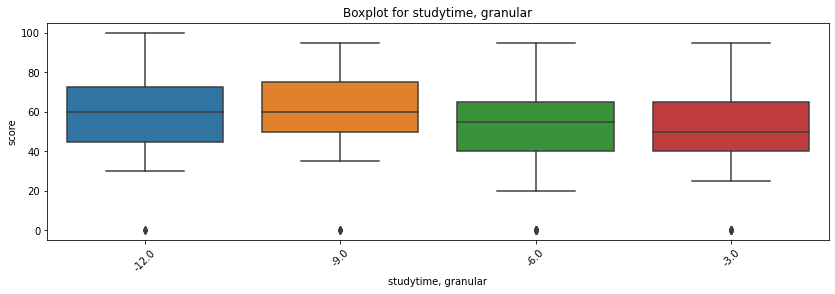

Кол-во пропусков: 7
В процентах: 1.7721518987341773


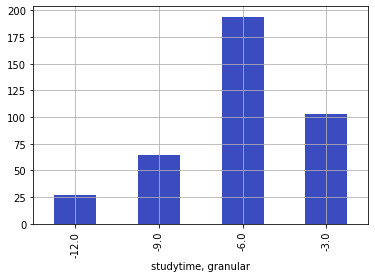

In [632]:
data_analysis("studytime, granular")

<h4>Internet

Графики internet


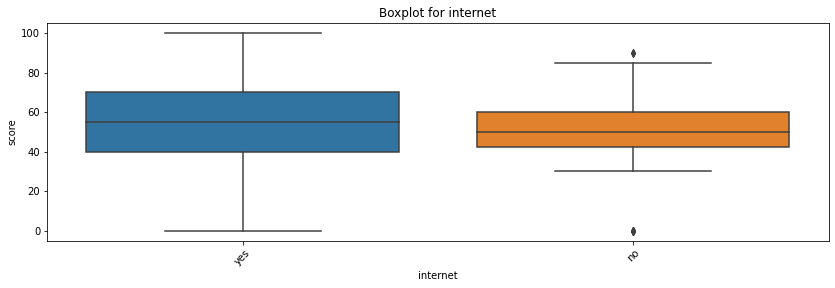

Кол-во пропусков: 34
В процентах: 8.60759493670886


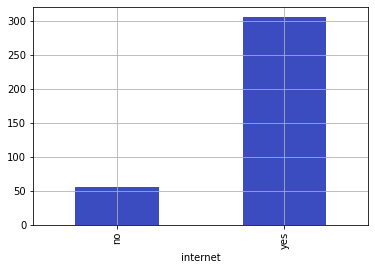

In [633]:
data_analysis("internet")

Заменить пропуски скорее всего возможно на Yes, т.к в XXI веке большенство владеет интернетом

<h4>Romantic

Графики romantic


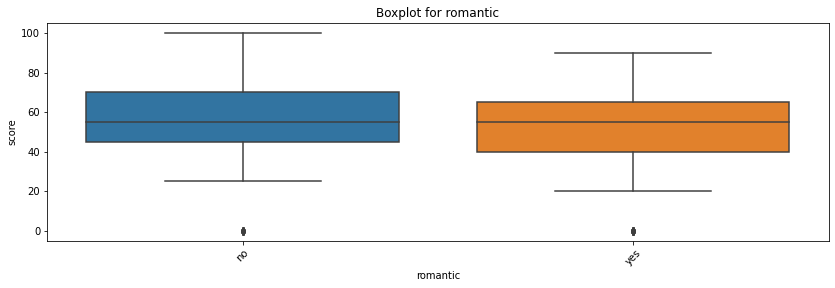

Кол-во пропусков: 31
В процентах: 7.848101265822785


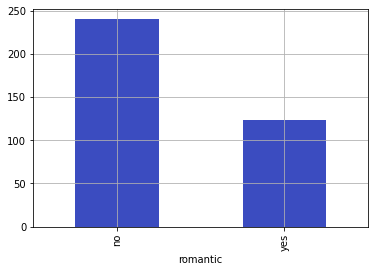

In [634]:
data_analysis("romantic")

<h4>Famrel

Графики famrel


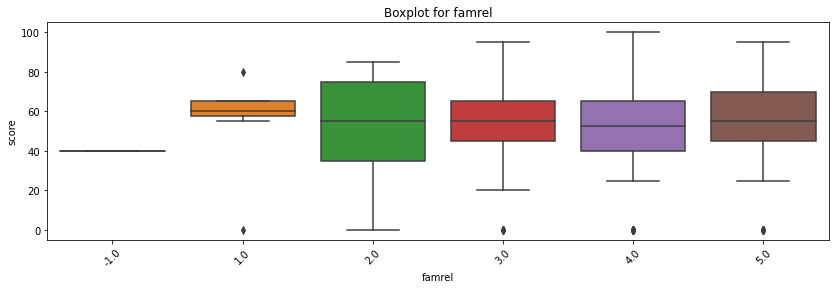

Кол-во пропусков: 27
В процентах: 6.8354430379746836


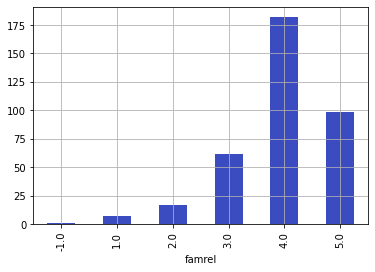

In [635]:
data_analysis("famrel")

Есть выброс в виде -1. Похоже на опечатку. Считаю что следует заметить это значение на 1

In [636]:
study.loc[25,"famrel"]=1

Графики famrel


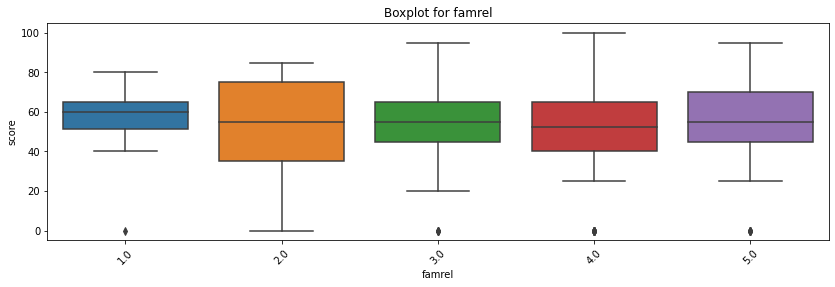

Кол-во пропусков: 27
В процентах: 6.8354430379746836


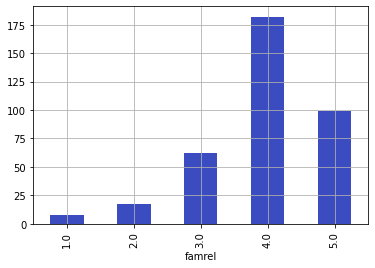

In [637]:
data_analysis("famrel")

<h4>Freetime 

Графики freetime


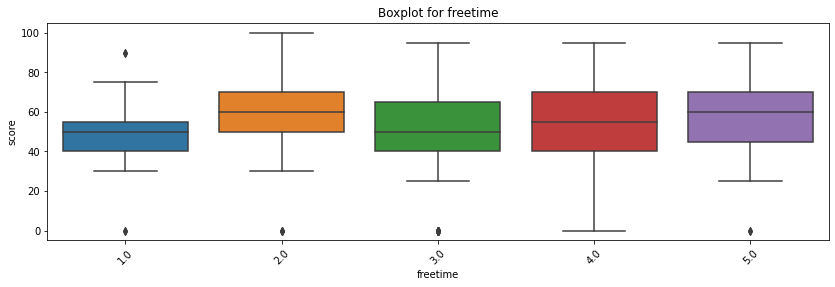

Кол-во пропусков: 11
В процентах: 2.7848101265822782


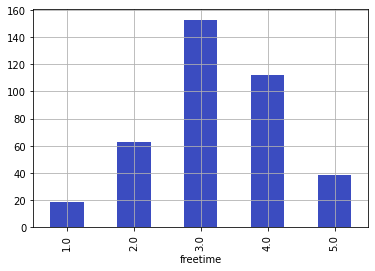

In [638]:
data_analysis("freetime")

<h4>Goout

Графики goout


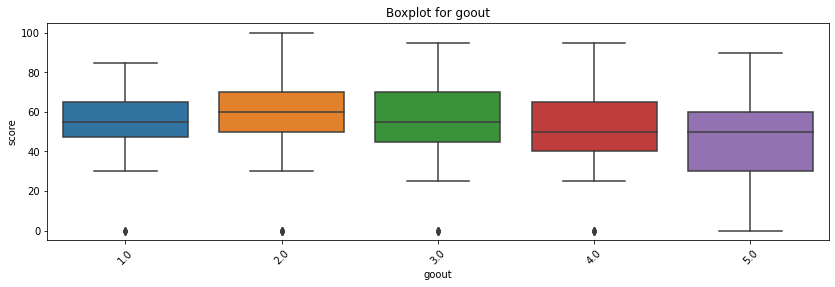

Кол-во пропусков: 8
В процентах: 2.0253164556962027


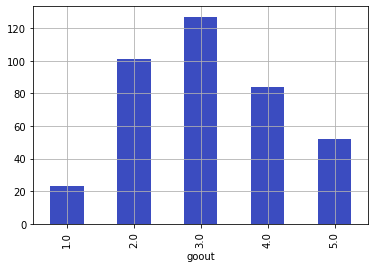

In [639]:
data_analysis("goout")

<h4>Health 

Графики health


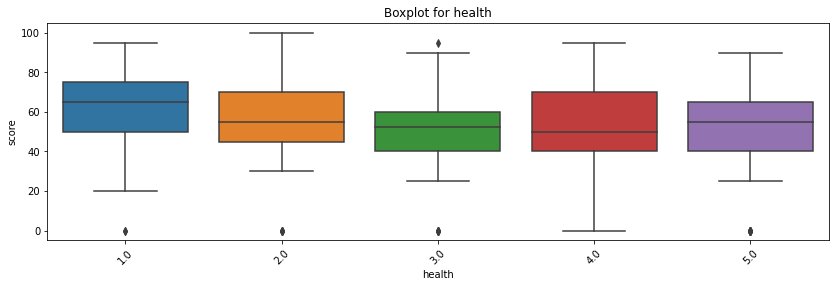

Кол-во пропусков: 15
В процентах: 3.79746835443038


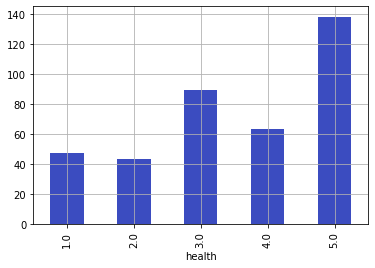

In [640]:
data_analysis("health")

<h4>Absences

Графики absences


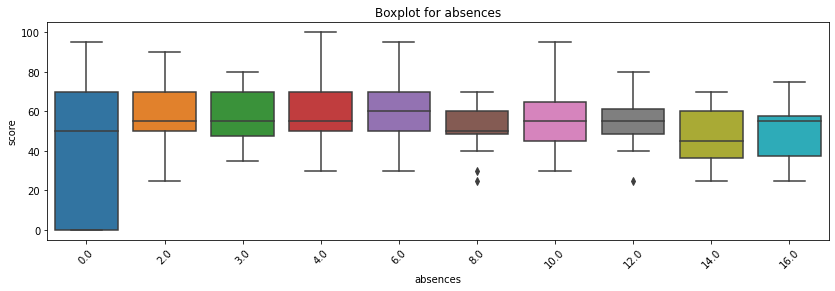

Кол-во пропусков: 12
В процентах: 3.0379746835443036


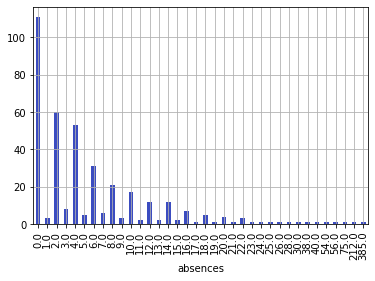

In [641]:
data_analysis("absences")

Очень странное распределение. Рассмотрим его подробнее

Видим, что основное распределение лежит на 0 и похоже на высокий процент выброса
Самый простой способ отфильтровать выбросы — воспользоваться формулой интерквартильного расстояния (межквартильного размаха).

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


24       NaN
40      25.0
74      54.0
101      NaN
103     26.0
120      NaN
129      NaN
150      NaN
172      NaN
183     56.0
198     24.0
205     28.0
215      NaN
216     22.0
222    385.0
227      NaN
254      NaN
260     21.0
265      NaN
270      NaN
276     75.0
277     22.0
280     30.0
307     38.0
313     22.0
315     40.0
320     23.0
352      NaN
390    212.0
Name: absences, dtype: float64

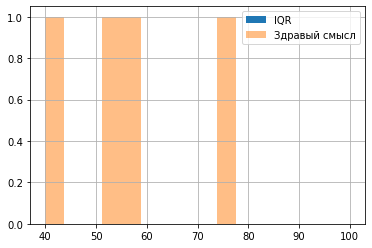

In [642]:
IQR = study.absences.quantile(0.75) - study.absences.quantile(0.25)
perc25 = study.absences.quantile(0.25)
perc75 = study.absences.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
study.absences.loc[study.absences.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 16, range = (40, 100), label = 'IQR')
 
study.absences.loc[study.absences <= 100].hist(
alpha = 0.5, bins = 16, range = (40, 100), label = 'Здравый смысл')
 
plt.legend();
study.loc[~study.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR), 'absences']

Имеется очень большие выбросы, а именно 212 и 385, т.к эти 2 человека пропустили больше чем учебных дней в году. Все остальные выглядят адекватно (возможно люди болели или т.п)

In [643]:
study = study.loc[study.absences < 100]

Графики absences


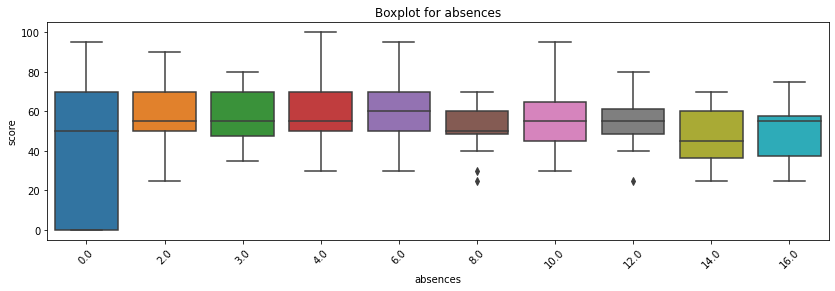

Кол-во пропусков: 0
В процентах: 0.0


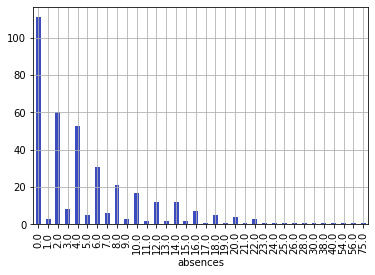

In [644]:
data_analysis("absences")

<h4>Score

Графики score


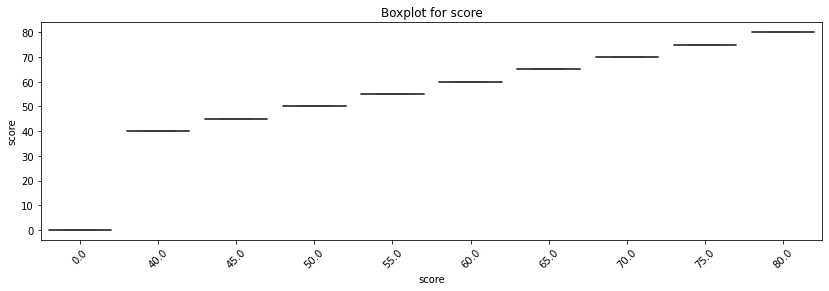

Кол-во пропусков: 5
В процентах: 1.3123359580052494


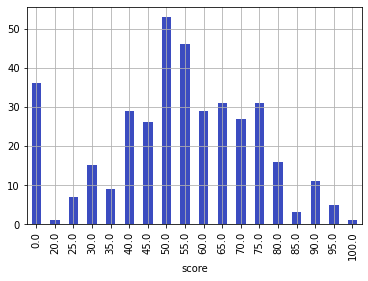

In [645]:
data_analysis("score")

Здесь пропуски недопустимы, т.к ML не сможет адекватно обучиться 

In [646]:
study = study.dropna(axis='index', how='any', subset=['score'])

Графики score


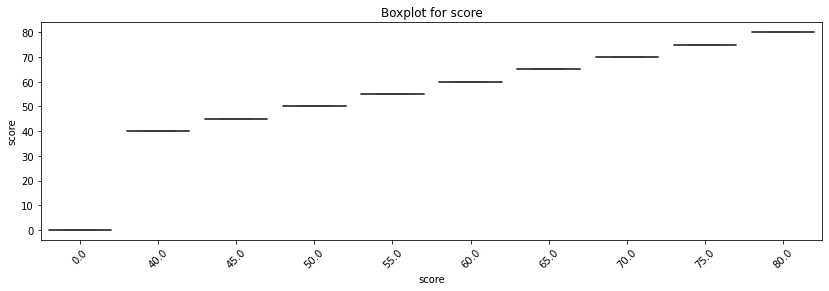

Кол-во пропусков: 0
В процентах: 0.0


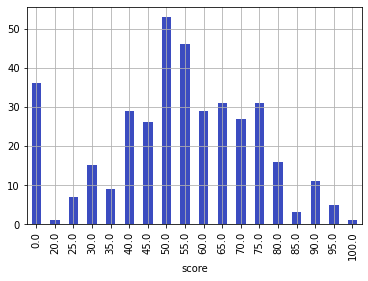

In [647]:
data_analysis("score")

<h2>Промежуточный вывод

<a>Данные можно использовать для ML. Пропусков в столбцах менее 12%. Выбросы стоит изменить, либо удалить (следует уточнить). Но в этой работе я решил заменить, т.к скорее всего это опечатка

<h2>3. Проведем корреляционный анализ

Выясним, какие столбцы коррелируют с итоговыми баллами. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 

Корреляции рассмотрим только для числовых столбцов.

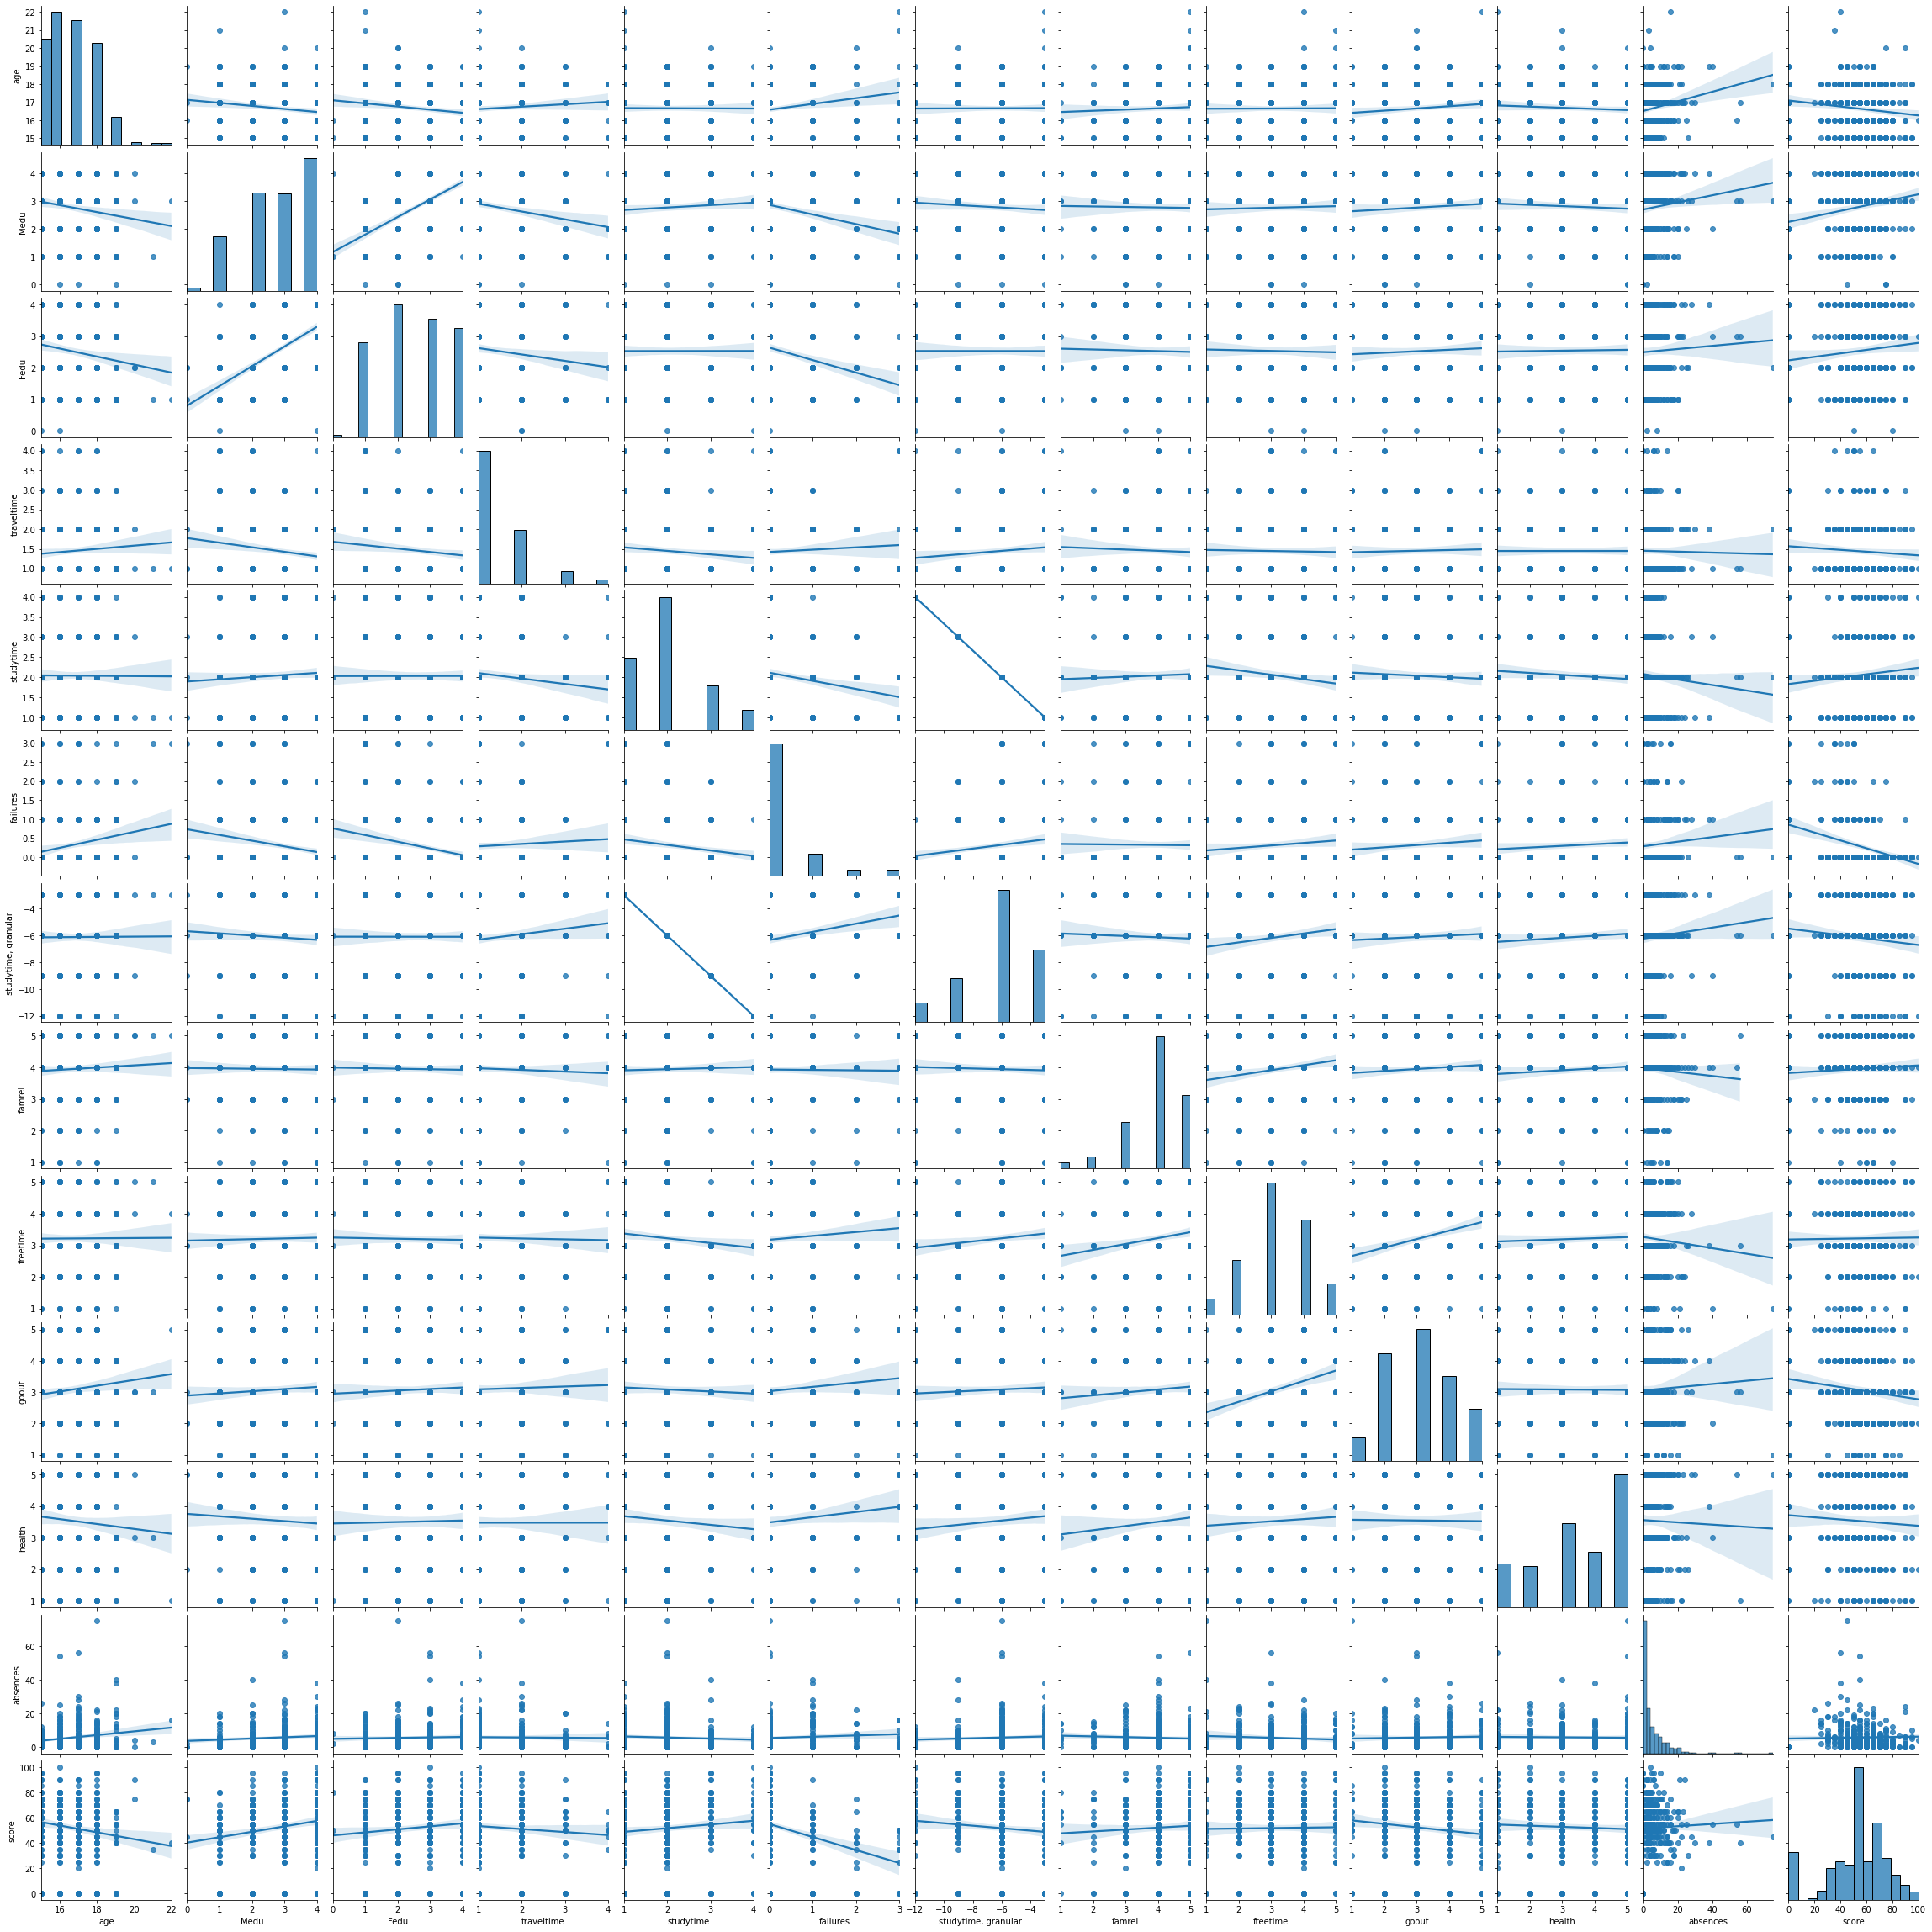

In [648]:
sns.pairplot(study, kind = 'reg')

Используем для наглядности матрицу корреляций:

In [649]:
study.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.144898,-0.147881,0.074448,-0.004998,0.182715,0.004998,0.049027,0.005115,0.106328,-0.070114,0.171939,-0.149349
Medu,-0.144898,1.000000,0.627594,-0.181062,0.068568,-0.227575,-0.068568,-0.014951,0.025776,0.067270,-0.058887,0.096016,0.206289
Fedu,-0.147881,0.627594,1.000000,-0.132417,0.000720,-0.263480,-0.000720,-0.021652,-0.020579,0.048406,0.017753,0.037930,0.114440
traveltime,0.074448,-0.181062,-0.132417,1.000000,-0.110456,0.060897,0.110456,-0.041178,-0.019421,0.029153,0.000211,-0.014284,-0.074311
studytime,-0.004998,0.068568,0.000720,-0.110456,1.000000,-0.171588,-1.000000,0.033209,-0.128357,-0.049597,-0.082969,-0.065809,0.108754
failures,0.182715,-0.227575,-0.263480,0.060897,-0.171588,1.000000,0.171588,-0.010326,0.089420,0.091243,0.084615,0.068090,-0.325769
"studytime, granular",0.004998,-0.068568,-0.000720,0.110456,-1.000000,0.171588,1.000000,-0.033209,0.128357,0.049597,0.082969,0.065809,-0.108754
famrel,0.049027,-0.014951,-0.021652,-0.041178,0.033209,-0.010326,-0.033209,1.000000,0.170989,0.076858,0.088522,-0.051829,0.059850
freetime,0.005115,0.025776,-0.020579,-0.019421,-0.128357,0.089420,0.128357,0.170989,1.000000,0.299088,0.049381,-0.068436,0.014591
goout,0.106328,0.067270,0.048406,0.029153,-0.049597,0.091243,0.049597,0.076858,0.299088,1.000000,-0.008827,0.038435,-0.133316


Так как переменные studytime и studytime, granular скоррелированы почти полностью, одну переменную можно исключить. Пусть это будет переменная studytime, granular.

In [650]:
study.drop('studytime, granular', axis = 1, inplace = True)

У нас остается все еще очень много параметров. Проверим какие колонки коррелируют с параметром score (нам нужны параметры, которые >0,1). Уберем лишние параметры

In [651]:
study.drop(['traveltime','famrel','freetime','health','absences'], axis = 1, inplace = True)

Проверим параметры в DataFrame

In [652]:
study.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'goout', 'score'],
      dtype='object')

<h2>Промежуточный вывод

<a>Время в пути до школы, семейные отношения, свободное время после школы,текущее состояние здоровья и количество пропущенных занятий не сильно влияют на итоговые баллы

<h2>4. Повторим анализ номинативных переменных с помощью box-plot и проверим параметры с помощью теста Стьюдента

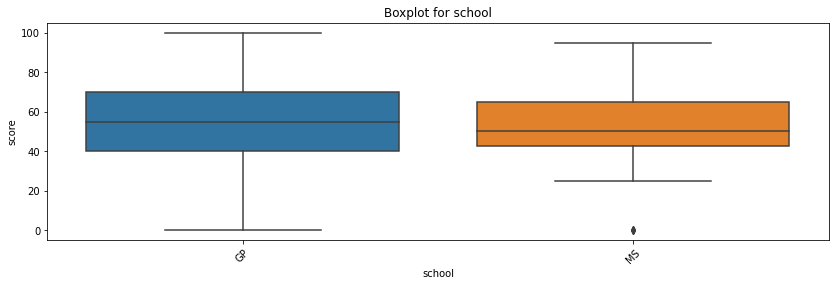

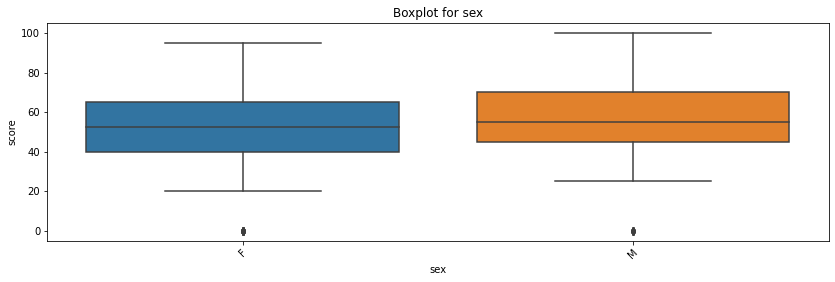

Найдены статистически значимые различия для колонки sex


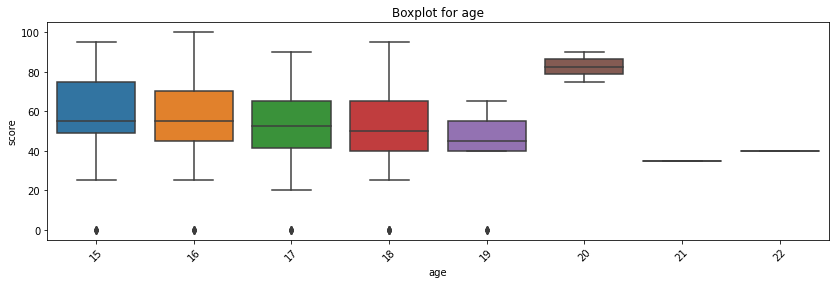

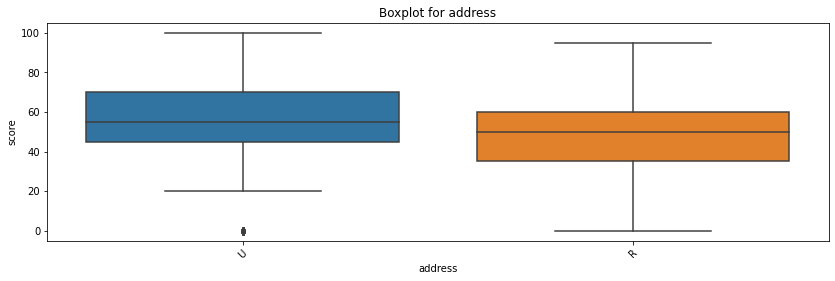

Найдены статистически значимые различия для колонки address


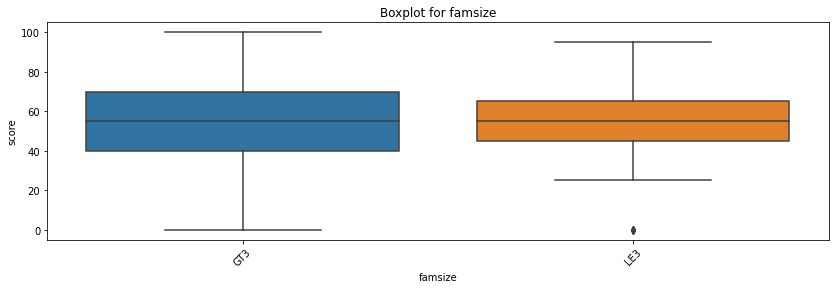

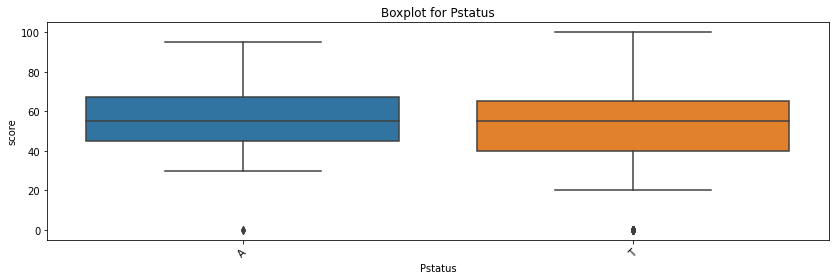

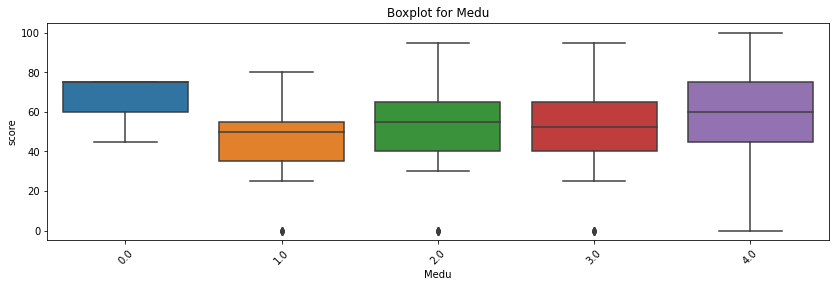

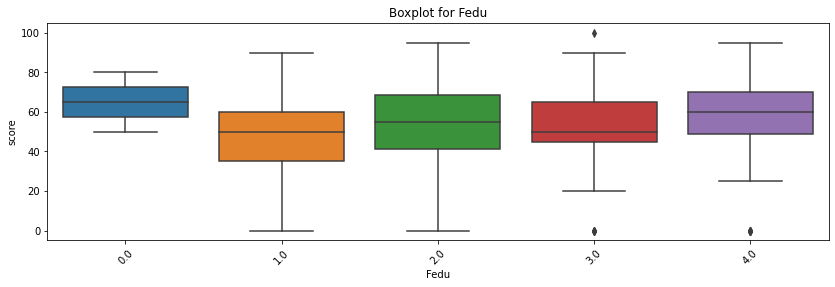

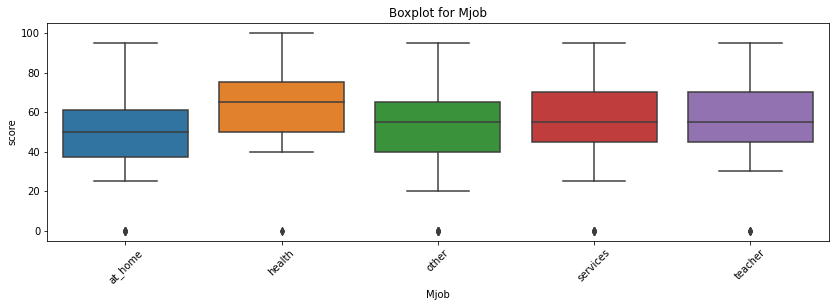

Найдены статистически значимые различия для колонки Mjob


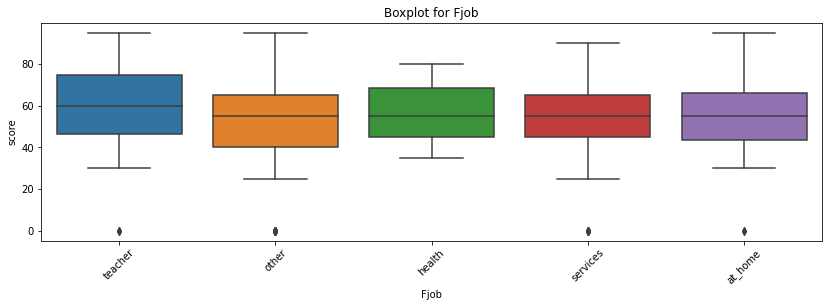

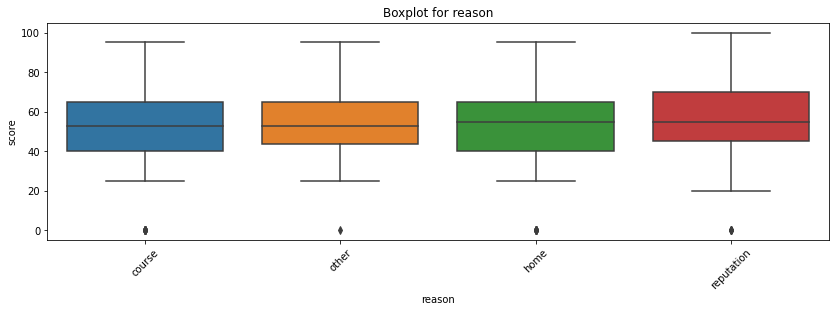

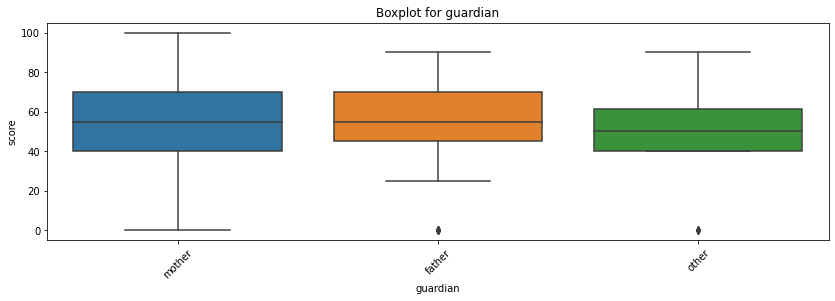

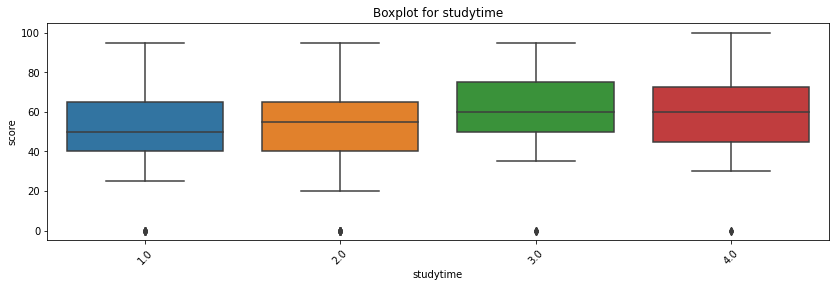

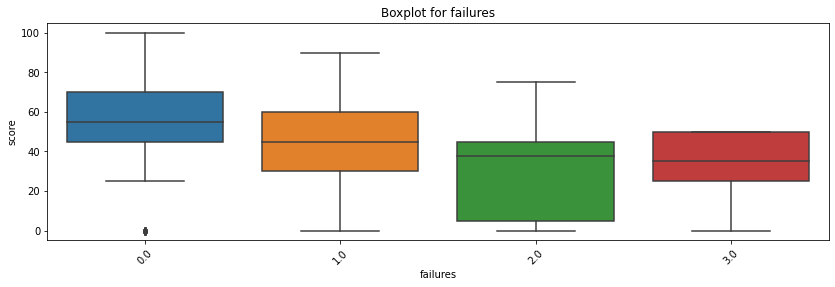

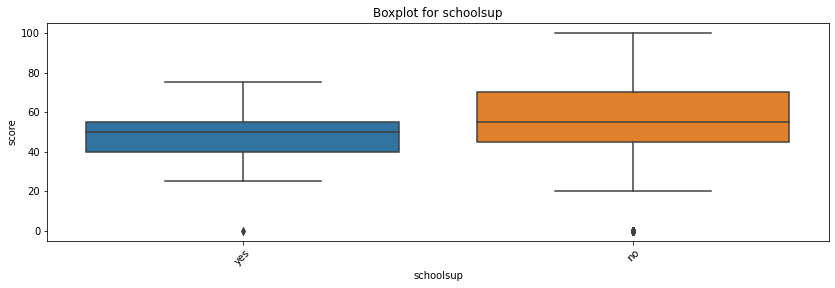

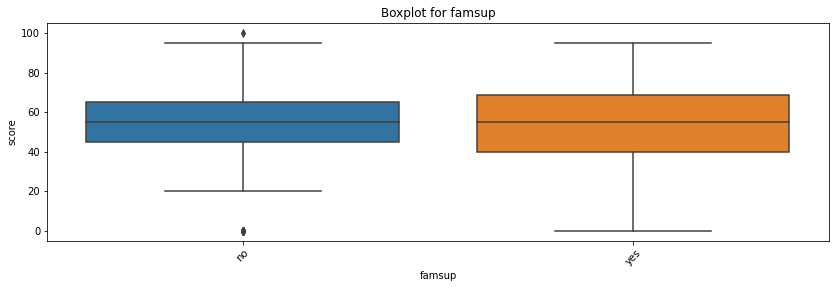

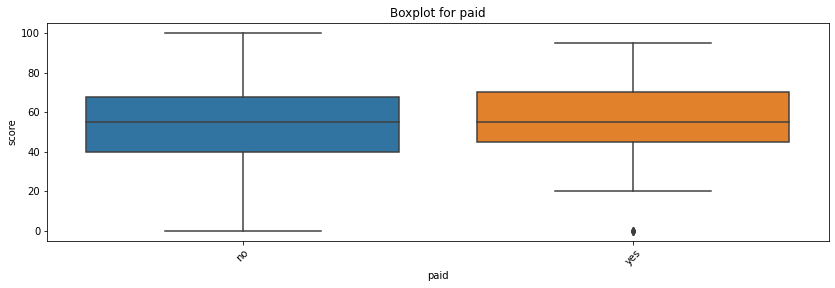

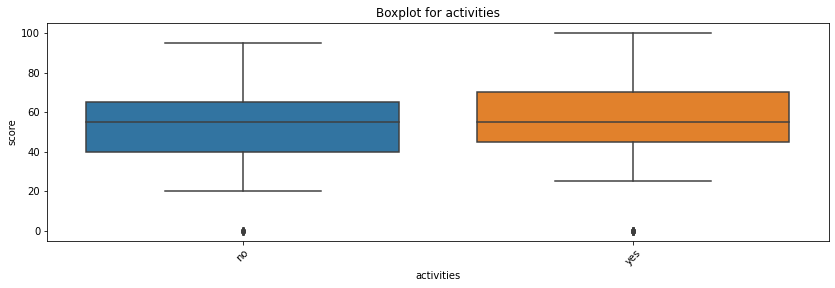

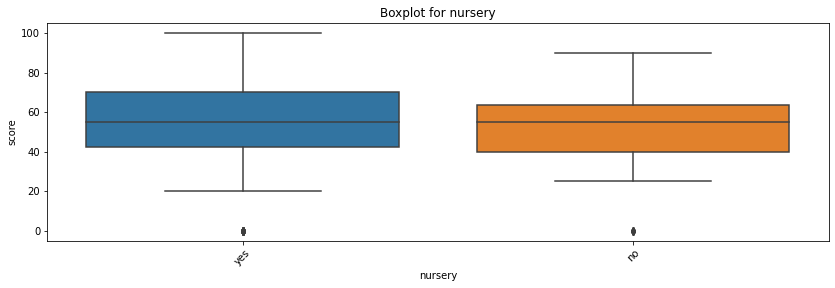

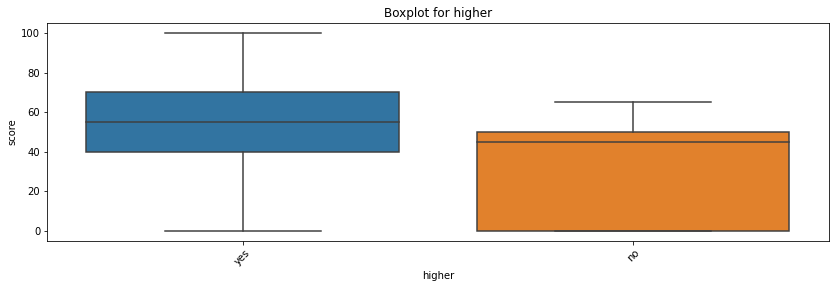

Найдены статистически значимые различия для колонки higher


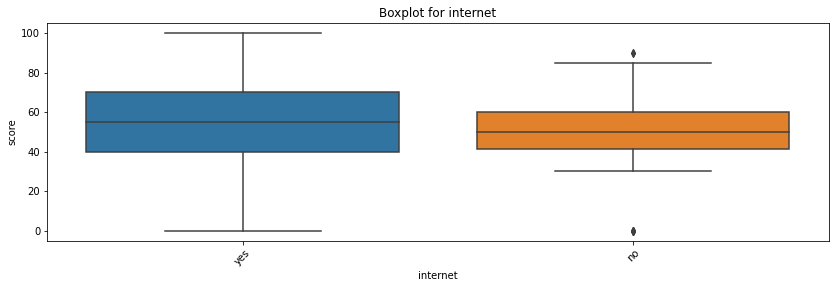

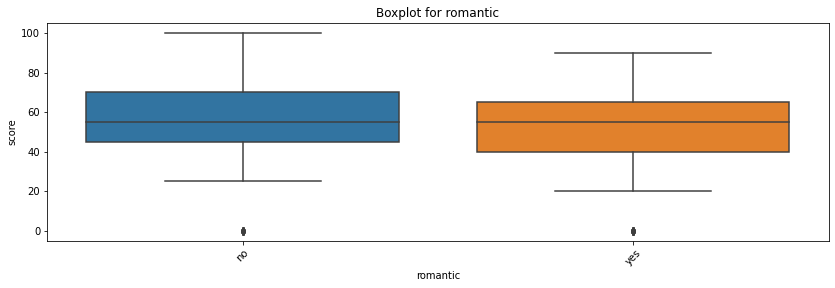

Найдены статистически значимые различия для колонки romantic


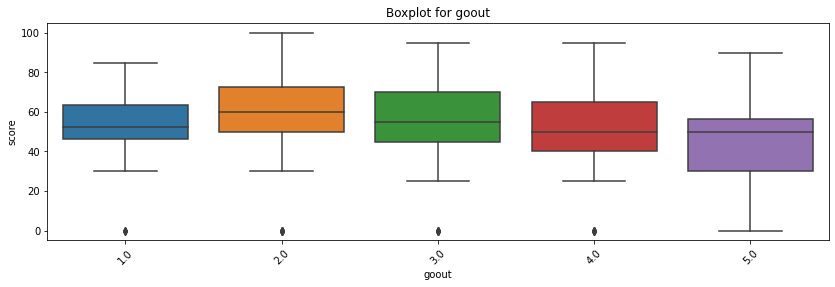

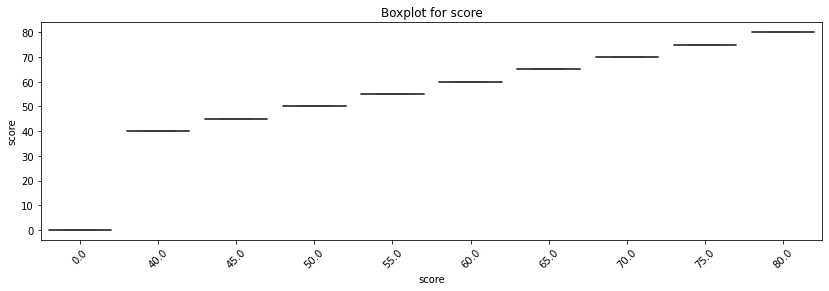

In [653]:
for col in study:
    get_boxplot(col)
    get_stat_dif(col)

<h2>Промежуточный вывод

Проанализировав полученные данные с помощь пункта 4, узнали что параметры sex, address, Mjob, schoolsup, paid, higher и romantic сильно влияют на итоговые баллые по математике, значит исключим все остальные столбцы

In [654]:
study.drop(['school','famsize','Pstatus','Fjob','reason','guardian'
           ,'famsup','activities','nursery','internet'], axis = 1, inplace = True)

Посмотрим на результат

In [655]:
study

,sex,age,address,Medu,Fedu,Mjob,studytime,failures,schoolsup,paid,higher,romantic,goout,score
0,F,18,U,4.0,4.0,at_home,2.0,0.0,yes,no,yes,no,4.0,30.0
1,F,17,U,1.0,1.0,at_home,2.0,0.0,no,no,yes,no,3.0,30.0
2,F,15,U,1.0,1.0,at_home,2.0,3.0,yes,NaN,yes,NaN,2.0,50.0
3,F,15,U,4.0,2.0,health,3.0,0.0,no,yes,yes,yes,2.0,75.0
4,F,16,U,3.0,3.0,other,2.0,0.0,no,yes,yes,no,2.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,F,18,U,1.0,1.0,other,2.0,1.0,no,no,yes,no,1.0,0.0
391,M,17,U,3.0,1.0,services,1.0,0.0,no,no,yes,no,5.0,80.0
392,M,21,R,1.0,1.0,other,1.0,3.0,NaN,no,NaN,no,3.0,35.0
393,M,18,R,3.0,2.0,services,1.0,0.0,no,no,yes,no,1.0,50.0


Интересно, что работа матери влияет на итоговый балл, а работа отца нет. Скорее всего воспитанием и первичным образованием занимаются больше матери

<h1>5. Вывод

a) В данных почти во всех столбцах присутствуют пропуски. Максимально кол-во пропусков 45 или 11%. В колонках school,sex,age пропусков не найдено

б) Некоторые выбросы возможно заменить, т.к скорее всего это опечатка, остальные пришлось убрать. Выбросы найдеты в параметрах Fedu, famrel

в) Наблюдается некачественные сбор данных

г) Время в пути до школы, семейные отношения, свободное время после школы,текущее состояние здоровья и количество пропущенных занятий не сильно влияют на итоговые баллы

д) Работа матери влияет на результаты экзамена, а работа отца - нет. Вероятно, что матери больше занимаются своими детьми

е) Для ML рекомендуется использовать параметры: sex, address, Mjob, schoolsup, paid, higher, romantic, Medu, Fedu, studytime, failures, goout

In [656]:
study.head()

,sex,age,address,Medu,Fedu,Mjob,studytime,failures,schoolsup,paid,higher,romantic,goout,score
0,F,18,U,4.0,4.0,at_home,2.0,0.0,yes,no,yes,no,4.0,30.0
1,F,17,U,1.0,1.0,at_home,2.0,0.0,no,no,yes,no,3.0,30.0
2,F,15,U,1.0,1.0,at_home,2.0,3.0,yes,NaN,yes,NaN,2.0,50.0
3,F,15,U,4.0,2.0,health,3.0,0.0,no,yes,yes,yes,2.0,75.0
4,F,16,U,3.0,3.0,other,2.0,0.0,no,yes,yes,no,2.0,50.0
